# SymbolicBayesNet

A `SymbolicBayesNet` is a directed acyclic graph (DAG) composed of `SymbolicConditional` objects. It represents the structure of a factorized probability distribution P(X) = Π P(Xi | Parents(Xi)) purely in terms of variable connectivity.

It is typically the result of running sequential variable elimination on a `SymbolicFactorGraph`.

<a href="https://colab.research.google.com/github/borglab/gtsam/blob/develop/gtsam/symbolic/doc/SymbolicBayesNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
%pip install --quiet gtsam-develop

Note: you may need to restart the kernel to use updated packages.


In [14]:
from gtsam import SymbolicConditional, SymbolicFactorGraph, Ordering
from gtsam.symbol_shorthand import X, L
import graphviz

## Creating a SymbolicBayesNet

SymbolicBayesNets are usually created by eliminating a [SymbolicFactorGraph](SymbolicFactorGraph.ipynb). But you can also build them directly:

In [15]:
from gtsam import SymbolicBayesNet

# Create a new Bayes Net
symbolic_bayes_net = SymbolicBayesNet()

# Add conditionals directly
symbolic_bayes_net.push_back(SymbolicConditional(L(1), X(0)))  # P(l1 | x0)
symbolic_bayes_net.push_back(SymbolicConditional(X(0), X(1)))  # P(x0 | x1)
symbolic_bayes_net.push_back(SymbolicConditional(L(2), X(1)))  # P(l2 | x1)
symbolic_bayes_net.push_back(SymbolicConditional(X(1), X(2)))  # P(x1 | x2)
symbolic_bayes_net.push_back(SymbolicConditional(X(2)))  # P(x2)

symbolic_bayes_net.print("Directly Built Symbolic Bayes Net:\n")

Directly Built Symbolic Bayes Net:
 
size: 5
conditional 0:  P( l1 | x0)
conditional 1:  P( x0 | x1)
conditional 2:  P( l2 | x1)
conditional 3:  P( x1 | x2)
conditional 4:  P( x2)


## Accessing Conditionals and Visualization

Conditional at index 1:  P( x0 | x1)


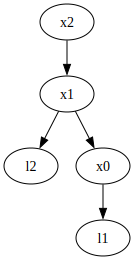

In [16]:
# Access a conditional by index
conditional_1 = bayes_net.at(1) # P(x0 | l1)
conditional_1.print("Conditional at index 1: ")

# Visualize the Bayes Net structure
display(graphviz.Source(bayes_net.dot()))